# Image Captioning Using Deep Learning algorithms
By Ahmed Amine MAJDOUBI

---

In this project we will be tackeling the problem of generating image captions. So we will be mainly using  image and text processing algorithms. This is a very interesting area of deep learning where humans excel at, which is compressing huge amount of images to just a few descriptive phrases. In this project, we will be using the ***'flickr30k_images'*** dataset along with a csv file containing reference captions.

We will start by performing a descriptive analysis of our data (both the images and the caption phrases), then we will proceed by writting out the problem we will be solving. The next step is to create our own algorithm to generate captions, and train it on our training dataset. Then we will define a specific accuracy metric to evaluate our model on the test dataset. Finaly we will perform a qualitative analysis of our results, and end the notebook with a conclusion on our work.

---

**Important Note:** If you want to run this notebook, you should do it using **Google Collaboration** service. Also you need to have a directory in your drive named ***'Features'*** to store the features that we will be creating, and another one inside it named ***'models' ***to store the deep learning models we will create. You also need to have a folder named*** 'flickr30k_images' ***that contains the 'results.csv' file and another folder with the name ***'flickr30k_images'*** that contains all the **flickr30k** images. Here is the structure of the files in my drive:


*  ***/content/drive***

  *   Path to your '*flickr30k_images*' folder (for me, it's ***students-share/Projet***)
      * ***/flickr30k_images***
          * *Results.csv*
          * ***/flickr30k_images*** (this folder contains all the **flickr30k** images)
  *   Path to your '*Features*' folder (for me, it's ***/My Drive***)
        * ***/Features***
            * ***/models***
            
You can get the first **flickr30k_images** folder from this **[*link*](https://www.kaggle.com/hsankesara/flickr-image-dataset/version/1)** and the '**Results.csv**' file from ***[my github](https://github.com/Mjidiba97/Image-Captioning/blob/master/results.csv)***.

# Analysing our Data



First of all, we will begin by reading our data and storing it in a dictionanry called **img_to_captions**, where each key is a path to an image, and the value is a list of strings containing caption phrases.

In [1]:
import os
import os.path as op
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
%matplotlib inline

# Get the path to the project folder
drive.mount("/content/drive")
# Change the path to where your flickr30k_images folder is in your drive
path_to_folder = "/content/drive/My Drive/students-share/Projet"
os.chdir(path_to_folder)
    
# Create the dictionnary
csv_path = "flickr30k_images/results.csv"
img_to_captions = {}
with open(csv_path) as F:
  for l in F.readlines()[1:]:
    l = l.split('|')
    img_name = l[0].strip()
    text = l[-1].strip()
    if img_name not in img_to_captions:
      img_to_captions[img_name] = [text]
    else:
      img_to_captions[img_name] += [text]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Let's plot an image with it's caption phrases, to get an idea of what our dataset looks like

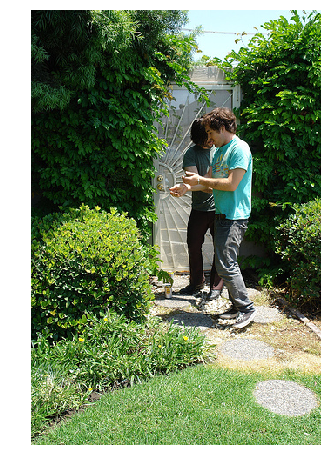

Two young guys with shaggy hair look at their hands while hanging out in the yard .
Two young , White males are outside near many bushes .
Two men in green shirts are standing in a yard .
A man in a blue shirt standing in a garden .
Two friends enjoy time spent together .


In [5]:
from PIL import Image

rootpath = "flickr30k_images/flickr30k_images/"

# display an image with its caption phrases
img_name = "1000092795.jpg"
img_path = op.join(rootpath, img_name)
image = Image.open(img_path)
captions = img_to_captions[img_name]
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image)
ax.set_axis_off()
plt.show()
for cap in captions:
  print(cap)

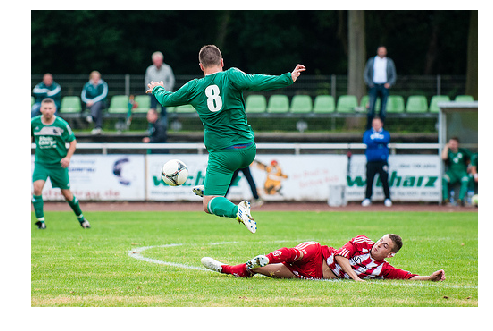

One soccer player , wearing green , leaping for a soccer ball , while an opposing player tries to sweep the ball from under him .
Soccer player leaps to avoid injuring an opposing player after a slide to kick the ball .
A soccer player jumping over the defender .
A soccer playing jumps to kick a ball .
number 8 is kicking the ball .


In [6]:
# display another image with its caption phrases
img_name = "7867736186.jpg"
img_path = op.join(rootpath, img_name)
image = Image.open(img_path)
captions = img_to_captions[img_name]
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image)
ax.set_axis_off()
plt.show()
for cap in captions:
  print(cap)

## Analysing the Images

The first thing we notice right away is that the images are of different sizes. We also see that images are not limited to human beings, it can be also other species or even objects. We also see that the images have different sizes. Let's investigates the limits of the size these images. Instead of analysing all the images, we will only be looking at the first 50 images to get an idea about our dataset.

In [7]:
# Get the maximum size of the images
max_width=0
max_height=0
resized_images=0
limit=50
path=''

for index, img_name in enumerate(img_to_captions.keys()):
  img_path = op.join(rootpath, img_name)
  width, height = Image.open(img_path).size
  max_width = max(width,max_width)     
  max_height = max(height,max_height)
  if width==500 or height==500:
    resized_images += 1
  else:
    path=img_path
  if index == limit:
     break

print('max width of images is: ',max_width)
print('max height of images is: ',max_height)
print('There are',resized_images,'images with at least one of its dimensions set to 500')

max width of images is:  500
max height of images is:  500
There are 48 images with at least one of its dimensions set to 500


So by looking at the first 100 images, we can see that they were resized proportionally so that their dimensions are kept smaller than or equal to 500px. We can also see that not all the images are resized to exactly 500px, meaning that if the image was already small, it probably wasn't resized.

## Analysing the Captions

First, let's see how many captions we have for each image.

In [8]:
num_captions=0
for captions in img_to_captions.values():
  num_captions += len(captions)

print('The average number of captions for each image is: ', num_captions/len(img_to_captions.values()))

The average number of captions for each image is:  5.0


So we have exactly 5 captions per image. Let's examine the difference between these captions.

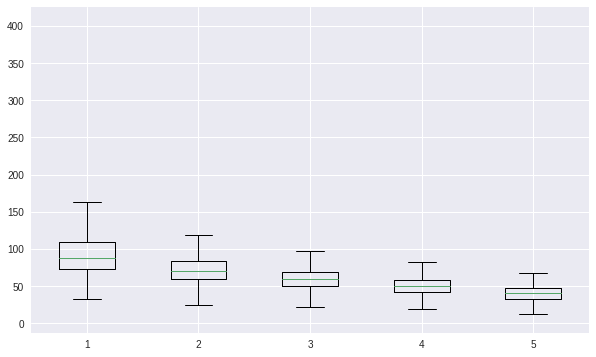

,first caption,second caption,third caption,fourth caption,fifth caption
count,31783.000000,31783.000000,31783.000000,31783.000000,31783.000000
mean,94.822704,73.022748,60.880062,51.128654,41.139225
std,31.742561,19.451316,14.992496,12.428626,10.744088
min,32.000000,24.000000,22.000000,14.000000,7.000000
25%,73.000000,59.000000,50.000000,42.000000,33.000000
50%,88.000000,70.000000,59.000000,50.000000,40.000000
75%,109.000000,83.000000,69.000000,58.000000,47.000000
max,406.000000,217.000000,175.000000,168.000000,179.000000


In [9]:
# Get the list of lengths of captions
len1= list()
len2= list()
len3= list()
len4= list()
len5= list()

for i, captions in enumerate(img_to_captions.values()):
    len1.append(len(captions[0]))
    len2.append(len(captions[1]))
    len3.append(len(captions[2]))
    len4.append(len(captions[3]))
    len5.append(len(captions[4]))

# Plot the distribution of the lengths of captions
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([len1, len2, len3, len4, len5])
plt.show()

# Get the avg max and min lengths of the captions
pd.DataFrame(list(zip(len1, len2, len3, len4, len5)), columns=['first caption','second caption','third caption','fourth caption','fifth caption']).describe()

We can see that the captions are ordered by length from the the longest to the shortest one. There isn't a lot of variations  in length for each caption. This means that probabably the first caption holds the most amount of information about the image, then the second, and so on.

Let's now analyse word frequency using the NLTK library. First we will make a list with all the caption phrases, then we will leave only alphabetic characters and numbers in the phrases, and make them to lower case. Then we will transform the captions list to word list and remove one-charachter words. 

In [10]:
import re
import nltk

# get a list of all the words in captions
all_captions = [caption for captions in img_to_captions.values() for caption in captions]
all_words = [word for caption in all_captions for word in re.sub(r'\W+', ' ', caption).lower().split() if len(word)>1]
 
# Output least common words
fdist = nltk.FreqDist(all_words)
print('\nTop 20 most common words')   
for word, frequency in fdist.most_common(20):
    print(u'{};{}'.format(word, frequency))


Top 20 most common words
in;83520
the;62985
on;45686
and;44299
man;42626
is;41117
of;38844
with;36208
woman;22213
two;21680
are;20196
to;17627
people;17338
at;16262
an;15884
wearing;15714
shirt;14342
white;13290
young;13219
black;12391


In order to get the important frequent words, we need to remove the stop words, so we will use the stop words list from nltk to filter our list. I don"t think we need to normalize the words, because if we want to generate captions later, we would need them to make a grammatical sense instead of giving just lemmatized words, plus it will be easier for the model to make predictions with this new small dictionnary. Let's plot the 30 most frequent words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

Top 30 most common words
man;42626
woman;22213
two;21680
people;17338
wearing;15714
shirt;14342
white;13290
young;13219
black;12391
blue;11390
red;10278
girl;9656
sitting;9620
men;9499
boy;9430
standing;9114
dog;9093
playing;8622
street;8012
group;7853
front;7610
walking;7339
holding;6987
one;6517
water;5975
three;5796
women;5276
green;5273
looking;5120
child;5080


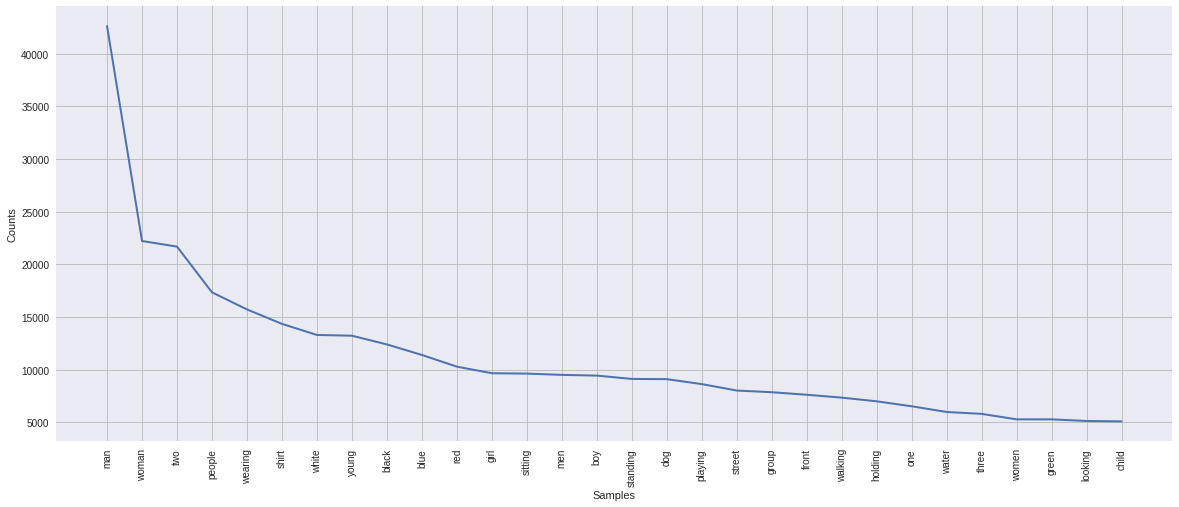

In [11]:
nltk.download('stopwords')
default_stopwords = set(nltk.corpus.stopwords.words('english'))

# get a list of all the non stop words from captions
all_nonstop_words = [word for caption in all_captions for word in re.sub(r'\W+', ' ', caption).lower().split() if word not in default_stopwords and len(word)>1]

print('\nTop 30 most common words')
# Output top 30 words
fdist = nltk.FreqDist(all_nonstop_words)
for word, frequency in fdist.most_common(30):
    print(u'{};{}'.format(word, frequency))

# Plot top 30 words
plt.figure(figsize=(20,8))
fdist.plot(30)

We see that most pictures include human beings (the words refering to human beings are mentioned 121118 times). Dogs are the most popular animal in the dataset. We also see that the captions contains often descriptions of what shirt they are wearing and the state they are in (sitting, standing, playing, looking, walking, holding...) and also the color of the scene. The last thing we observe is that the captions are often quantitative (one, two, group...).

Let us also analyse the bigrams and trigrams in the caption.

In [12]:
# Output top 30 bigrams
fdist = nltk.FreqDist(nltk.bigrams(all_nonstop_words))
print('Top 20 Most Frequent bigrams\n-------------------')
for word, frequency in fdist.most_common(20):
    print(u'{};{}'.format(word, frequency))

#Output top 30 trigrams    
fdist = nltk.FreqDist(nltk.trigrams(all_nonstop_words))
print('\n\nTop 20 Most Frequent trigrams\n-------------------')
for word, frequency in fdist.most_common(20):
    print(u'{};{}'.format(word, frequency))

Top 20 Most Frequent bigrams
-------------------
('two', 'men');4223
('man', 'wearing');3852
('group', 'people');3313
('young', 'boy');2360
('two', 'people');2278
('blue', 'shirt');2158
('white', 'shirt');2128
('two', 'women');2013
('woman', 'wearing');2012
('little', 'girl');1999
('young', 'girl');1938
('young', 'man');1897
('man', 'woman');1840
('man', 'blue');1622
('little', 'boy');1590
('man', 'black');1577
('white', 'dog');1491
('wearing', 'blue');1469
('red', 'shirt');1466
('wearing', 'black');1450


Top 20 Most Frequent trigrams
-------------------
('man', 'blue', 'shirt');729
('man', 'white', 'shirt');710
('man', 'black', 'shirt');491
('man', 'wearing', 'black');479
('black', 'white', 'dog');470
('man', 'red', 'shirt');395
('man', 'wearing', 'blue');388
('wearing', 'blue', 'shirt');364
('wearing', 'white', 'shirt');351
('man', 'wearing', 'white');328
('two', 'young', 'boys');288
('wearing', 'red', 'shirt');287
('wearing', 'black', 'shirt');285
('two', 'young', 'girls');278
('br

We can see that the dominant pattern in captions is describing how many people are in the picture, and what shirt color they are wearing. Since most of the bigrams and trigrams have man in the beginning, I predict that our model will be biased toward te word 'man', because it is often present in captions. Let us now proceed to creating a model that generates captions from images.

# Annoucing the Problem
In this project, we will be trying to generate a caption from an image. Our model will have a convolutional neural network (CNN) as an encoder to convert the images into a vector of features, then it will be feeded into an long short-term memory network (LSTM) as a decoder to generate a sequence of words from a dictionnary that we will be creating. This sequence of words will represent our generated caption phrase
## Accuracy metric
To evaluate the model's performance on the validation set, we will use the 'Bilingual Evaluation Understudy Score' (see the paper: [BLEU: a Method for Automatic Evaluation of Machine Translation](http://www.aclweb.org/anthology/P02-1040.pdf)). The score will be the sum of all the BLEU scores measured on all 5 captions of the image.

  The BLEU score counts the number of similar n-grams in two phrases. These matches are position-independent. It gives a score between 0 (perfect match) and 1 (perfect mismatch). We will be using the BLEU tool that is available in the NLTK library


# Creating the Model

The model we will be creating is based on the “merge-model” from the paper '[Where to put the Image in an Image Caption Generator](https://arxiv.org/pdf/1703.09137.pdf)'. 

The model is divided in two parts. First we have an encoder that will read images with their captions and output a fixed-length vector. The encoder is divided into two networks: the first network is a convolutional neural network that tranforms each image into a vector of features. 

As for the second network, the captions are first transformed into a sequence of words, so that each time the model is provided the previously generated words to predict the next word in the caption. These sequences of words have a pre-defined length, which the maximum length of all captions. In order to signal the start and the end of the captions, we will add the tokens *'startcaption'* and *'endcaption'* to the sequences as they are loaded into the network. These sequences are then fed to a Embedding layer that ignores padded values. Then the output of the Embedding layer is fed to a LSTM network that outputs features with the same length of that of the CNN.

The second part of the model is a decoder which will merge the vectors from both input models using an addition operation, and then feed them through a Dense layer that will take the feature vector of the decoder, and make a softmax prediction over the output vocabulary for the next word in the sequence. 

## Creating images features
By looking at our dataset, we see that in order to generate captions similar to the ones provided for the images, our CNN model will need to be able to classify thousands of objects. This is going to be hard to achieve with a CNN model with only 32000 pictures. Not only that, but it's going to take a lot of time to train, and probably won't give great results because of the size of our dataset. So we will be using a pretrained model that is already capable of classifying thousands of objects. 

For this purpose, we will be using the **VGG** model using **Keras VGG class**. We will remove the last layer from the VGG model because we are interested in the internal representation of the photo right before the classification is made. Since this step will take a lot of time, we will be storing the created features in a file, so we can call it directly after.

So Let's create a function that creates a dictionnary of image_name-features that takes the file directory containing images as an input. The function will load each photo, prepare it for VGG, and collect the predicted features from the VGG model.

In [13]:
from os import listdir
from pickle import dump
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import tensorflow as tf

# Test if we are using the GPU
print('GPU used:',tf.test.gpu_device_name(),'\n-----------------')

# load the model
model = VGG16()

# re-structure the model
model.layers.pop()
model = Model(inputs=model.inputs, outputs=model.layers[-1].output)

# summarize
print(model.summary())

Using TensorFlow backend.


GPU used: /device:GPU:0 
-----------------
Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 18s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)    

**Important Note: ** Even with the GPU, it takes a rediculous amount of time to create the features from the VGG model, so I will be only using the fifth of the dataset (6356 images) to precompute the features. This new dataset will be divided after to a training and a testing set.

In [0]:
# Creating a list of names of pictures that will be used for the new data (a fifth of the old data)
imageNames = listdir(rootpath)[:int(len(listdir(rootpath))/5)]

So the pretrained model will transform the images into 4096 features vectors. Let us now precompute the images features and store them in a file on a folder created in our personal Drive called 'Features'.

**Important Note: **If you already excecuted this next code before (check if there exists a file named ***'features.pkl'*** in your ***Features*** folder), then you don't need to run it again.

In [0]:
# extract features from each photo
features = dict()
k=0
l=0
for name in imageNames:
  k +=1
  # load an image from file
  image = load_img(op.join(rootpath, name), target_size=(224, 224))
  # convert the image pixels to a numpy array
  image = img_to_array(image)
  # reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  # prepare the image for the VGG model
  image = preprocess_input(image)
  # get features
  feature = model.predict(image, verbose=0)
  # store feature
  features[name] = feature
  if k>=(int(len(imageNames)/10):
    l +=10
    k = 0
    print('Finished '+str(l)+'% of the images')

print('Extracted %d features'% len(features))

# save to file
dump(features, open('/content/drive/My Drive/Features/features.pkl', 'wb'))  
print('Saved to file features.pkl in Features folder')

Finished 10% of the images
Finished 20% of the images
Finished 30% of the images
Finished 40% of the images
Finished 50% of the images
Finished 60% of the images
Finished 70% of the images
Finished 80% of the images
Finished 90% of the images
Finished 100% of the images
Extracted 6356 features


So now we have a file that contains the name of the pictures along with their vector of features. Each feature vector contains 4096 elements. It takes two hours to generate the features of the 6356 images with the free GPU provided by Google Collaboration
.

## Preparing the captions data
First we will create a new dictionnary from the old dictionnary 'img_to_captions', this new one only contains the keys for the images that are included in the file 'features.pkl'. Then, in order to decrease the size of the dictionnary we will be working with, we will clean the captions in the following ways:


1.   Convert to lowercase
2.   Remove everything but letters
3.   Remove all words that are one character in length

We wil not remove stop words, so that our captions make a grammatical sense. Finally, we will export the dictionary of image identifiers and descriptions to a text file called ***'captions.txt'*** in our ***'Features'*** folder, Each line in the text file will have one image identifier and one caption.

**Important Note: **If you already excecuted this next code before (check if there exists a file named ***'captions.txt'*** in your ***Features*** folder), then you don't need to run it again.

In [0]:
# Create the new dictionnary
captions_features = {k: v for k, v in img_to_captions.items() if k in imageNames}
print("Old dataset length: ", len(img_to_captions))
print("New dataset length: ", len(captions_features))

# Clean the captions
captions_features_cleaned = captions_features
for key, desc_list in captions_features_cleaned.items():
  for i in range(len(desc_list)):
    desc = desc_list[i]
    # remove anything but alphabetic characters and numbers
    desc = re.sub(r'\W+', ' ', desc)
    # tokenize the caption
    desc = desc.split()
    # convert to lower case
    desc = [word.lower() for word in desc]
    # remove one character words
    desc = [word for word in desc if len(word)>1]
    # remove tokens with numbers in them
    desc = [word for word in desc if word.isalpha()]
    # transform the caption to a string again
    desc_list[i] =  ' '.join(desc)

# Creating the word dictionnary
all_captions = [caption for captions in captions_features_cleaned.values() for caption in captions]
all_words = [word for caption in all_captions for word in caption.split()]
word_freq = nltk.FreqDist(all_words)
word_dictionnary = [word for word in word_freq.keys()]
word_dictionnary_no_unique = [word for word in word_freq.keys() if word_freq[word]>1]
print('Vocabulary size:', len(word_dictionnary))
print('Vocabulary size after removing words that only occured once:', len(word_dictionnary_no_unique))

# Saving the captions file
lines = list()
for key, desc_list in captions_features_cleaned.items():
  for desc in desc_list:
    lines.append(key + ' ' + desc)
data = '\n'.join(lines)
file = open('/content/drive/My Drive/Features/captions.txt', 'w')
file.write(data)
file.close()
print('\nCaptions saved in captions.txt in Features folder')

Old dataset length:  31783
New dataset length:  6356
Vocabulary size: 9665
Vocabulary size after removing words that only occured once: 6154

Captions saved in captions.txt in Features folder


## Preparing the data
Let us now create the proper input for our data. First let's split the list of image names (***imageNames*** list) into a training set and a test set. The split ratio will be 80% for the trainning set and 20% for the test set.

In [15]:
# Create two lists of images names for both training set and test set
split = int(len(imageNames)*0.8)
imageNames_train = imageNames[:split]
imageNames_test = imageNames[split:]
print('Training set size:',len(imageNames_train))
print('Testing set size:',len(imageNames_test))

Training set size: 5084
Testing set size: 1272


First, let's start by loading the two dictionnaries corresponding to training features and captions. We will add the ***'startcaption'*** and ***'endcaption'*** tokens to every caption, so our decoder knows when the captions starts and when it ends.

In [16]:
from pickle import load

# load image features into memory
all_features = load(open('/content/drive/My Drive/Features/features.pkl', 'rb'))
train_features = {k: all_features[k] for k in imageNames_train}
test_features = {k: all_features[k] for k in imageNames_test}

# Read the captions file
file = open('/content/drive/My Drive/Features/captions.txt', 'r')
# read all text
doc = file.read()
# close the file
file.close()

# load captions into memory
train_captions = dict()
test_captions = dict()
for line in doc.split('\n'):
  # split line by white space
  tokens = line.split()
  # split id from description
  image_id, image_desc = tokens[0], tokens[1:]
  # skip images not in the set
  if image_id in imageNames_train:
    # create list
    if image_id not in train_captions:
      train_captions[image_id] = list()
    # wrap description in tokens
    desc = 'startcaption ' + ' '.join(image_desc) + ' endcaption'
    # store
    train_captions[image_id].append(desc)
  if image_id in imageNames_test:
    # create list
    if image_id not in test_captions:
      test_captions[image_id] = list()
    # wrap description in tokens
    desc = 'startcaption ' + ' '.join(image_desc) + ' endcaption'
    # store
    test_captions[image_id].append(desc)
    
len(train_features), len(train_captions), len(test_features), len(test_captions)

(5084, 5084, 1272, 1272)

Then, we need to encode the captions text to numbers. We will use Keras's *Tokenizer* class to create a consistent mapping from words to unique integer values.

In [17]:
from keras.preprocessing.text import Tokenizer

# create a list of captions
train_captions_list = list()
for key in train_captions.keys():
  [train_captions_list.append(d) for d in train_captions[key]]

# fit a tokenizer to the captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_captions_list)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 8839


It's now time to make a function that creates the word sequences that we were talking about earlier. We will split each caption into words, then each time the model will be provided with a sequence of first n words along with image features to generate the next word.

Later, when the model is used to generate descriptions, the generated words will be concatenated and recursively provided as inputs to generate a caption for an image. There are two input arrays to the model: one for photo features (**X1**) and one for the encoded text (**X2**). There is one output for the model which is the encoded next word in the text sequence (**y**).

Since we are training the model on an 12 GB RAM workstation, we will need to use something called progressive loading. So we will first define a data generator function, then we will define a function that returns the sequences of** X1**, **X2** and **y** from a set images.


In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from numpy import array

# calculate the maximum length of captions in words
max_length = max(len(d.split()) for d in train_captions_list)

# data generator, intended to be used in a call to model.fit_generator()
def data_generator():
	# loop for ever over images
	while 1:
		for key, desc_list in train_captions.items():
			# retrieve the photo feature
			photo = train_features[key][0]
			in_img, in_seq, out_word = create_sequences(desc_list, photo)
			yield [[in_img, in_seq], out_word]

# create the input and output arrays
def create_sequences(desc_list, photo):
  X1, X2, y = list(), list(), list()
  # walk through each description for the image
  for desc in desc_list:
    # encode the sequence
    seq = tokenizer.texts_to_sequences([desc])[0]
    # split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
      # split into input and output pair
      in_seq, out_seq = seq[:i], seq[i]
      # pad input sequence
      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
      # encode output sequence
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
      # store
      X1.append(photo)
      X2.append(in_seq)
      y.append(out_seq)
  return array(X1), array(X2), array(y)

## Defining the model
We already talked about the model structure, which is an encoder-decoder based on the 'merge-model' (see paper [Where to put the Image in an Image Caption Generator and a decoder](https://arxiv.org/abs/1703.09137)). For more information about the model, see section ***'Creating the Model'***. We will be using **ADAM** optimizer, and we will add a **Dropout** layer for both the encoder inputs. The loss function is **categorical_crossentropy**, because our model will make a a softmax prediction over the entire output vocabulary for the next word in the sequence. Let us define this model in Keras.

In [19]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint

# feature extractor model
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# sequence model
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
# tie it together [image, seq] [word]
model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')
# summarize model
print(model.summary())

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 63)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 63, 256)      2262784     input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 4096)         0           input_2[0][0]               

Let's now train our model on our dataset. We will be using our generator function that returns the inputs **X1**, **X2** and output **y**. This function will be used in a call to the function ***fit_generator()*** of our model. We will run our model on 15 epochs, and export a model for each epoch, so we can choose the best model after training it.


**Important Note: **If you already excecuted this next code before (check if there exists 15 files named ***'model_i.h5.pkl'*** (i from 0 to 14) in your ***'Features/models/''*** folder), then you don't need to run it again.

In [0]:
# train the model, run epochs manually and save after each epoch
epochs = 15
steps = len(train_captions)
for i in range(epochs):
	# create the data generator
	generator = data_generator()
	# fit for one epoch
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	# save model to the Features folder
	model.save('/content/drive/My Drive/Features/models/model_' + str(i) + '.h5')

Epoch 1/1
5084/5084 [==============================] - 994s 195ms/step - loss: 5.1624
Epoch 1/1
5084/5084 [==============================] - 992s 195ms/step - loss: 4.3948
Epoch 1/1
5084/5084 [==============================] - 990s 195ms/step - loss: 4.1198
Epoch 1/1
5084/5084 [==============================] - 989s 195ms/step - loss: 3.9424
Epoch 1/1
5084/5084 [==============================] - 993s 195ms/step - loss: 3.8212
Epoch 1/1
5084/5084 [==============================] - 998s 196ms/step - loss: 3.7336
Epoch 1/1
5084/5084 [==============================] - 992s 195ms/step - loss: 3.6574
Epoch 1/1
5084/5084 [==============================] - 995s 196ms/step - loss: 3.5993
Epoch 1/1
5084/5084 [==============================] - 1000s 197ms/step - loss: 3.5593
Epoch 1/1
5084/5084 [==============================] - 998s 196ms/step - loss: 3.5170
Epoch 1/1
5084/5084 [==============================] - 1000s 197ms/step - loss: 3.4873
Epoch 1/1
5084/5084 [==============================]

So after four hours of execution time, Our model has finished training. We see that the loss kept decreasing until the last epoch. So we could have added some epochs to train our model. But the purpose of this project is not to get the best accuracy.

# Evaluating the Model
Now it's time to evaluate the performance of our model on the test data. As we said earlier, we will use the ***BLEU*** score from the ***NLTK*** library.

First of all we will create a function that takes the model and the image as parameters and returns a string representing the generated caption phrase.

In [0]:
from numpy import argmax

# map an integer to a word
def word_for_id(integer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a caption for an image
def generate_cap(model, photo):
	# seed the generation process
	in_text = 'startcaption'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endcaption':
			break
	return in_text

## Bilingual Evaluation Understudy Score

Now that we can predict captions from images, let's evaluate now our model on the test set using the BLEU score method. we will load the last model that was saved, which is ***'model_14.h5'***.

In [33]:
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

# load the model
model = load_model('/content/drive/My Drive/Features/models/model_14.h5')

# make the predictions on all over the test set
actual, predicted = list(), list()
# step over the whole set
for key, captions_list in test_captions.items():
  # generate description
  yhat = generate_cap(model, test_features[key])
  # store actual and predicted
  references = [d.split() for d in captions_list]
  actual.append(references)
  predicted.append(yhat.split())

# calculate BLEU score for 1 cumulative n-gram
print('BLEU Score of our model: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))

BLEU Score of our model: 0.448120


So we got a BLEU score of 0.44 on the test set.

## Analysing the predictions

Let's predict the captions of some random images from the test dataset and see how well our model performs.

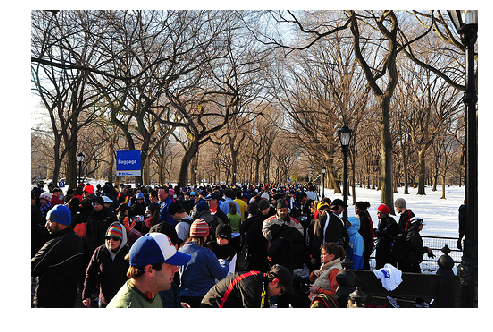

Original captions
-----------------------
crowd of people in winter garb gather in the street against backdrop of bare trees and snow 
people are gathered in street there is snow on the ground 
group of people gather in park during the winter 
large crowd of people are in park during winter 
people crowd sidewalk in the cold 

Predicted caption
-----------------------
man in blue shirt and jeans is standing in front of crowd of people 


In [27]:
# take a random image from the test set
import random
image_name = random.choice(list(test_captions))

# plot the image
img_path = op.join(rootpath, image_name)
image = Image.open(img_path)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image)
ax.set_axis_off()
plt.show()

# print the original captions
print('Original captions\n-----------------------')
for caption in test_captions[image_name]:
  print(caption[13:-10])
  
# display the generated caption
generated_caption = generate_cap(model, test_features[image_name])
print('\nPredicted caption\n-----------------------')
print(generated_caption[13:-10])

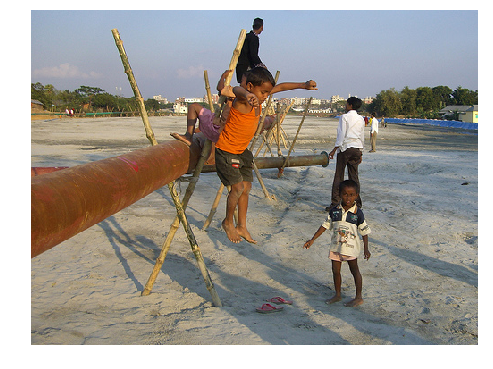

Original captions
-----------------------
boy in an orange shirt plays on large drainpipe with several other children in sandy area 
little black boy with an orange tank top and shorts jumped to the sand below 
children play barefoot in the sand next to rusting oil pipeline 
boy in orange jumping off rusted colored pipe into sand 
child jumps off of pipes at sandy beach 

Predicted caption
-----------------------
man in blue shirt and black shorts is standing on the beach 


In [31]:
# take a random image from the test set
import random
image_name = random.choice(list(test_captions))

# plot the image
img_path = op.join(rootpath, image_name)
image = Image.open(img_path)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image)
ax.set_axis_off()
plt.show()

# print the original captions
print('Original captions\n-----------------------')
for caption in test_captions[image_name]:
  print(caption[13:-10])
  
# display the generated caption
generated_caption = generate_cap(model, test_features[image_name])
print('\nPredicted caption\n-----------------------')
print(generated_caption[13:-10])

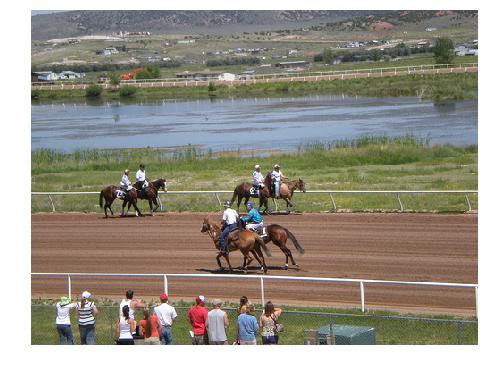

Original captions
-----------------------
there are horses riding on track field with mountains in the background and people in the foreground watching 
spectators are watching horses and their riders on fenced path with pond behind the path 
group of spectators is watching brown horses race with pond in the background 
eleven spectators are watching three race horses on dirt track 
multiple people are horseback riding on track 

Predicted caption
-----------------------
man in blue shirt and black shorts is riding bicycle 


In [32]:
# take a random image from the test set
import random
image_name = random.choice(list(test_captions))

# plot the image
img_path = op.join(rootpath, image_name)
image = Image.open(img_path)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(image)
ax.set_axis_off()
plt.show()

# print the original captions
print('Original captions\n-----------------------')
for caption in test_captions[image_name]:
  print(caption[13:-10])
  
# display the generated caption
generated_caption = generate_cap(model, test_features[image_name])
print('\nPredicted caption\n-----------------------')
print(generated_caption[13:-10])

## Comments
The results we got are not very good. In fact our model is heavily biased towards the words 'man', 'blue' and 'shirt'. Since these are the most frequent words in our dataset (maybe even more frequent in that 20% of the dataset that we chose), So it almost always starts with ***'man in blue shirt'***. 

In order to improve our model predictions, I suggest these mehtods:


*   Use the whole dataset instead of only 20% of it. If we had better computing power, we could have used the whlole dataset, and it could have improve our predictions by a lot
*   Fine tune the VGG model on our dataset before generating the features
*   Add more layers to our deep learning model, tune its parameters, and train it on more epochs 
*   Take the occurrence of the words in the reference text into account to avoid overgenrating “reasonable” words, not rewarding a candidate translation that generates an abundance of reasonable words like 'men' or 'shirt'.
*   Make an even smaller vocabulary by removing the words that only occured once or twice in all the dataset captions







# Conclusion

In this project we were able to create a model that is able to generate captions from images. It was trained on the ***flickr30k_images*** along with 5 cpation phrases for each image. The model learned how describe actions (standing, riding), and learned how to generate grammatically correct captions. 

This is not by any measure the state of the art of image captioning. When we just use CNNs to compress the image and then generate the captions, we are loosing a lot of description. One paper that I found interesting that tackles this problem is [***'Show, Attend and Tell'***](https://arxiv.org/pdf/1502.03044.pdf) paper that utilises a form of attention mechanism over time to generate captions. it considers the sequence generated thus far, and attends to the part of the image that needs describing next. One advantage of incorporating it is the ability to generate what the model sees at each step, which add an extra level of interpretability to the model.

Since we had both images and captions data, we could have changed problem to instead predict the images from the captions. One way to do it is to use **Generative Adversarial Networks** to create our model like in the paper ***['Generative Adversarial Text to Image Synthesis'](https://arxiv.org/pdf/1605.05396.pdf)***.